# ECG

### [The MIT-BIH Long Term Database](https://archive.physionet.org/physiobank/database/ltdb/)
#### This database contains 7 long-term ECG recordings (14 to 22 hours each), with manually reviewed beat annotations.

#### 14134 – Age: 71  Sex: F

## Waveform
<br>
<img src="14134.png" alt="ECG_DB">

In [1]:
# Importar as bibliotecas
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Definir a taxa de amostragem
# 0.0078125 s = 128 Hz
sample_rate = 128 

In [3]:
# Importar os dados
db = pd.read_csv('14134.csv')
db

,'sample interval','ECG1','ECG2'
0,'0.0078125 sec','mV','mV'
1,0,-0.020,-0.160
2,1,-0.010,-0.210
3,2,-0.020,-0.160
4,3,0.030,-0.190
...,...,...,...
7676,7675,0.000,-0.160
7677,7676,-0.050,-0.160
7678,7677,-0.090,-0.110
7679,7678,-0.010,-0.150


In [4]:
db.columns = ['sample interval', 'ECG1', 'ECG2']
db

,sample interval,ECG1,ECG2
0,'0.0078125 sec','mV','mV'
1,0,-0.020,-0.160
2,1,-0.010,-0.210
3,2,-0.020,-0.160
4,3,0.030,-0.190
...,...,...,...
7676,7675,0.000,-0.160
7677,7676,-0.050,-0.160
7678,7677,-0.090,-0.110
7679,7678,-0.010,-0.150


In [5]:
filtro = db.loc[(db['ECG1'] == "'mV'")]
filtro
db = db.drop(filtro.index)

In [6]:
db.dtypes

sample interval    object
ECG1               object
ECG2               object
dtype: object

In [7]:
data = db['ECG1'].astype(float, errors = 'raise')

## Plot waveform 

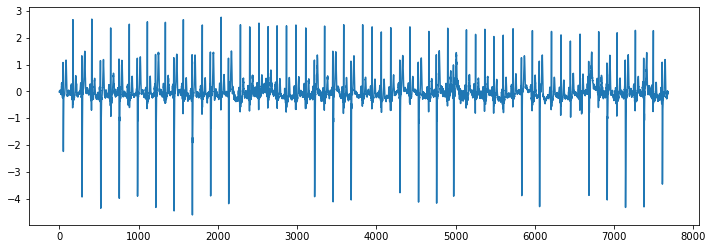

In [8]:
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

C:\Users\Lucia\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

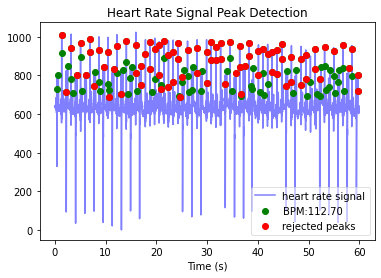

bpm: 112.695652
ibi: 532.407407
sdnn: 163.305735
sdsd: 115.939810
rmssd: 280.013013
pnn20: 1.000000
pnn50: 0.875000
hr_mad: 93.750000
sd1: 195.086539
sd2: 98.644898
s: 60457.725579
sd1/sd2: 1.977665
breathingrate: 0.139256


In [9]:
# Análise
wd, m = hp.process(hp.scale_data(data), sample_rate)

plt.figure(figsize=(12,4))

hp.plotter(wd, m)
plt.show()

# Mostrar as medidas computadas
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))